# 기본 모델링
* GBR
* RF
* MLP
* SVR

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [3]:
raw_data = pd.read_csv('data/train_data_hs.csv',)

In [4]:
len(raw_data.id.unique())

1253

In [5]:
raw_data.head()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,F,I,M
0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0,0,1
1,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0,1,0
2,3,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0,1,0
3,4,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0,0,1
4,5,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0,1,0


In [37]:
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error

In [7]:
train_data = raw_data[~(raw_data.id%10).isin([3,5,7])]
vali_data = raw_data[(raw_data.id%10).isin([3,5,7])]

In [8]:
y_col = ['Target']

In [9]:
x_col = list(raw_data.columns)
x_col.remove('id')
x_col.remove('Target')

In [10]:
train_X = train_data[x_col]

In [11]:
train_y = train_data[y_col]

* MLPRegressor(batch_size=200, hidden_layer_sizes=(300, 100, 100), early_stopping=True, validation_fraction=0.3))

In [120]:
# model = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=2))
# model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=2))
# model = make_pipeline(StandardScaler(), MLPRegressor(random_state=2))
model = make_pipeline(StandardScaler(), SVR())

In [121]:
# model = GradientBoostingRegressor(random_state=2)
# model = RandomForestRegressor(random_state=2)
# model = MLPRegressor(random_state=2)
# model = SVR()

In [122]:
model.fit(train_X, train_y)

/home/hshan/venvs/api/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [123]:
test_data = vali_data.copy()

In [124]:
test_data['pred'] = model.predict(vali_data[x_col])

(0.0, 30.0)

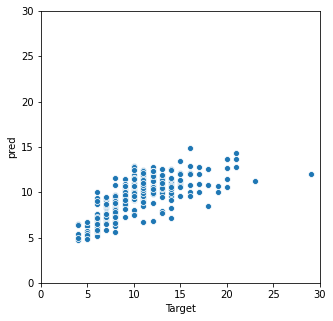

In [125]:
plt.figure(figsize = (5,5))
g1 = sns.scatterplot(data=test_data, x='Target', y='pred',)
g1.set_xlim([0, 30])
g1.set_ylim([0, 30])

In [126]:
round(NMAE(test_data.Target, test_data.pred)*100, 3)

15.933

* Basic

|종류|NMAE|
|---|---|
|GBR|17.167|
|RF|18.171|
|MLP|18.058|
|SVR|17.961|

* Basic + Scaler

|종류|NMAE|
|---|---|
|GBR|17.104|
|RF|17.546|
|MLP|16.264|
|SVR|15.933|

In [127]:
test_data = pd.read_csv('data/test.csv')

In [128]:
test_data2 = test_data.copy()
test_data2 = test_data2.join(pd.get_dummies(test_data['Gender'])).drop(['Gender'], axis=1)

In [129]:
test_data2.head(2)

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,F,I,M
0,1,0.595,0.47,0.155,1.121,0.4515,0.1780,0.155,1,0,0
1,2,0.580,0.45,0.150,0.927,0.2760,0.1815,0.360,0,0,1


In [133]:
res_data = test_data2[['id']]
res_data['Target'] = model.predict(test_data2[x_col])

/home/hshan/venvs/api/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
result.to_csv('result/res_svr_stdsc_basic.csv', index=False)